In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('test2_modify.csv')
df

,IsCanceled,LeadTtime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,day_meal,foreigner,Country_ratio,country_simple,car_yes,RA,RA_changed
0,0,342,2015,July,27,1,0,0,2,0,...,0,Check-Out,2015-07-01,1,0,0.445247,PRT,0,CC,0
1,0,737,2015,July,27,1,0,0,2,0,...,0,Check-Out,2015-07-01,1,0,0.445247,PRT,0,CC,0
2,0,7,2015,July,27,1,0,1,1,0,...,0,Check-Out,2015-07-02,1,1,0.172088,GBR,0,AC,1
3,0,13,2015,July,27,1,0,1,1,0,...,0,Check-Out,2015-07-02,1,1,0.172088,GBR,0,AA,0
4,0,14,2015,July,27,1,0,2,2,0,...,1,Check-Out,2015-07-03,1,1,0.172088,GBR,0,AA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39591,0,212,2017,August,35,31,2,8,2,1,...,0,Check-Out,2017-09-10,1,1,0.172088,GBR,0,AA,0
39592,0,169,2017,August,35,30,2,9,2,0,...,1,Check-Out,2017-09-10,1,1,0.054702,IRL,0,EE,0
39593,0,204,2017,August,35,29,4,10,2,0,...,3,Check-Out,2017-09-12,1,1,0.054702,IRL,0,EE,0
39594,0,211,2017,August,35,31,4,10,2,0,...,1,Check-Out,2017-09-14,3,1,0.172088,GBR,0,DD,0


### EDA (Explorstory Data Analysis, 탐색적 데이터 분석)
- 시각화 그래프를 그리기 위한 Columns을 선택해야 함
- DataFrame에 Feature 의 객수가 많다면, 경우의 수가 너많아짐 -> 축소 -> Feature Selection
- Feature Selecttion > filler, wrapper, embed

In [7]:
df.columns

Index(['IsCanceled', 'LeadTtime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'Adr', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'day_meal', 'foreigner', 'Country_ratio', 'country_simple', 'car_yes',
       'RA', 'RA_changed'],
      dtype='object')

In [8]:
# 가장 중요한가 높은 Feature 선택
features = ['LeadTtime', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 
       'DaysInWaitingList', 'Adr', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'day_meal', 'foreigner', 'Country_ratio', 'car_yes', 'RA_changed']
label = 'IsCanceled'

In [9]:
X, y = df[features], df[label]

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39596 entries, 0 to 39595
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LeadTtime                    39596 non-null  int64  
 1   ArrivalDateYear              39596 non-null  int64  
 2   ArrivalDateWeekNumber        39596 non-null  int64  
 3   ArrivalDateDayOfMonth        39596 non-null  int64  
 4   StaysInWeekendNights         39596 non-null  int64  
 5   StaysInWeekNights            39596 non-null  int64  
 6   Adults                       39596 non-null  int64  
 7   Children                     39596 non-null  int64  
 8   Babies                       39596 non-null  int64  
 9   IsRepeatedGuest              39596 non-null  int64  
 10  PreviousCancellations        39596 non-null  int64  
 11  PreviousBookingsNotCanceled  39596 non-null  int64  
 12  BookingChanges               39596 non-null  int64  
 13  DaysInWaitingLis

In [11]:
X.shape

(39596, 22)

In [12]:
y.shape

(39596,)

In [13]:
set(df[label])

{0, 1}

In [14]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()

In [15]:
model.fit(X, y)

RandomForestClassifier()

In [16]:
model.feature_importances_

array([0.18335321, 0.03435755, 0.08306683, 0.07399357, 0.03367445,
       0.05150675, 0.01640958, 0.01392834, 0.00197447, 0.00510322,
       0.02793567, 0.00856761, 0.02698896, 0.00140995, 0.12952804,
       0.03221287, 0.03723985, 0.02210569, 0.06604692, 0.07424238,
       0.0316227 , 0.04473139])

In [17]:
features = ['LeadTtime', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 
       'DaysInWaitingList', 'Adr', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'day_meal', 'foreigner', 'Country_ratio', 'car_yes', 'RA_changed']

In [18]:
# 학습한 결과에 대한 변수면 변경 방법
imp = pd.DataFrame() 
imp['farture'] = features
imp['importances'] = model.feature_importances_
imp

,farture,importances
0,LeadTtime,0.183353
1,ArrivalDateYear,0.034358
2,ArrivalDateWeekNumber,0.083067
3,ArrivalDateDayOfMonth,0.073994
4,StaysInWeekendNights,0.033674
5,StaysInWeekNights,0.051507
6,Adults,0.016410
7,Children,0.013928
8,Babies,0.001974
9,IsRepeatedGuest,0.005103


In [19]:
imp.sort_values(by='importances', ascending=False).head(5)

,farture,importances
0,LeadTtime,0.183353
14,Adr,0.129528
2,ArrivalDateWeekNumber,0.083067
19,Country_ratio,0.074242
3,ArrivalDateDayOfMonth,0.073994


In [20]:
len(set(df['LeadTtime']))

412

In [21]:
tgt = df.groupby('LeadTtime').agg({label: 'mean'}).reset_index()

In [22]:
import  seaborn as sns

<Axes: xlabel='LeadTtime', ylabel='IsCanceled'>

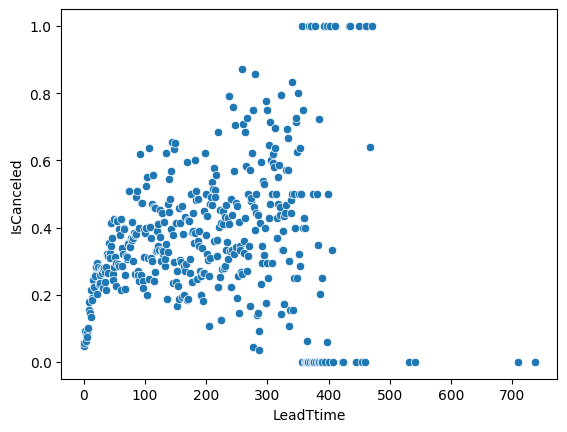

In [23]:
sns.scatterplot(data=tgt, x='LeadTtime', y='IsCanceled')

In [24]:
tgt

,LeadTtime,IsCanceled
0,0,0.048366
1,1,0.056172
2,2,0.092920
3,3,0.079487
4,4,0.063566
...,...,...
407,471,1.000000
408,532,0.000000
409,542,0.000000
410,709,0.000000


<Axes: xlabel='LeadTtime', ylabel='IsCanceled'>

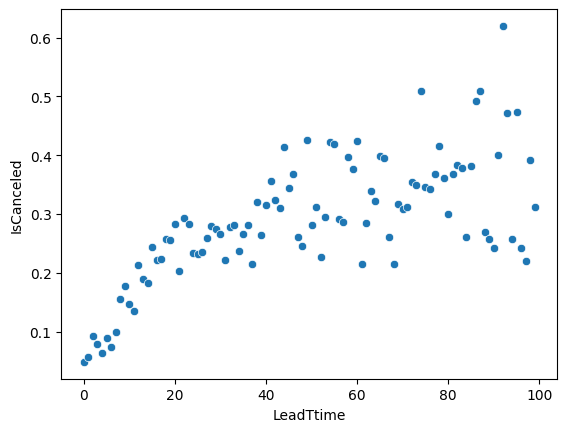

In [25]:
tgt2 = tgt.loc[tgt['LeadTtime'] < 100]
sns.scatterplot(data=tgt2, x='LeadTtime', y='IsCanceled')

# 21일(3주) 전 까지 선령 구조를 보임 -> LeadTime이 길어짐에 따라 예약 취소율 함께 증가 함
# 20~40일 사이에서 20~30% 정도의  취소율 보이고 있음.
# 50 일부터는 취소율이 다양해지고 있음 -> LeadTime이 예약 취소율에 비치는 영향이 줄어든다고 해석할 수 있음.

In [26]:
# LeadTime 별 예약 취소율 확인
# 프로투갈 입장에서 내국인과 외국인의 예약 최소율 차이 ?
tgt = df.groupby(['LeadTtime', 'foreigner']).agg({label : 'mean'}).reset_index()
tgt

,LeadTtime,foreigner,IsCanceled
0,0,0,0.065923
1,0,1,0.018261
2,1,0,0.075975
3,1,1,0.021544
4,2,0,0.114530
...,...,...,...
781,471,0,1.000000
782,532,1,0.000000
783,542,1,0.000000
784,709,1,0.000000


<Axes: xlabel='LeadTtime', ylabel='IsCanceled'>

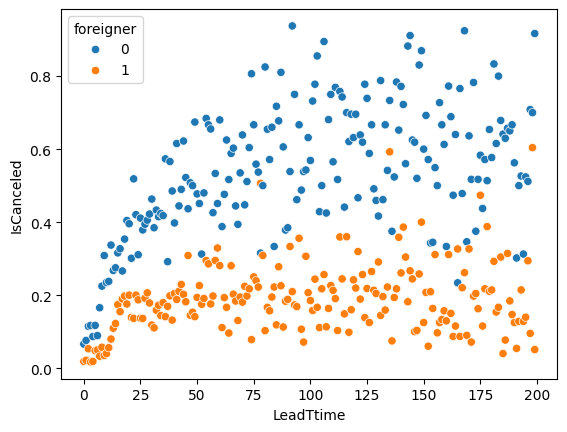

In [27]:
tgt2 = tgt.loc[tgt['LeadTtime'] < 200]
sns.scatterplot(data=tgt2, x='LeadTtime', y='IsCanceled', hue='foreigner')

In [28]:
# 예약한 객실과 배정된 객실이 다흔 경우
# 예약 최소율에 대한 차이가 있을까 ?

tgt = df.groupby(['LeadTtime', 'RA_changed']).agg({label : 'mean'}).reset_index()
tgt

,LeadTtime,RA_changed,IsCanceled
0,0,0,0.057992
1,0,1,0.029907
2,1,0,0.069036
3,1,1,0.032967
4,2,0,0.106713
...,...,...,...
745,532,0,0.000000
746,542,0,0.000000
747,542,1,0.000000
748,709,0,0.000000


<Axes: xlabel='LeadTtime', ylabel='IsCanceled'>

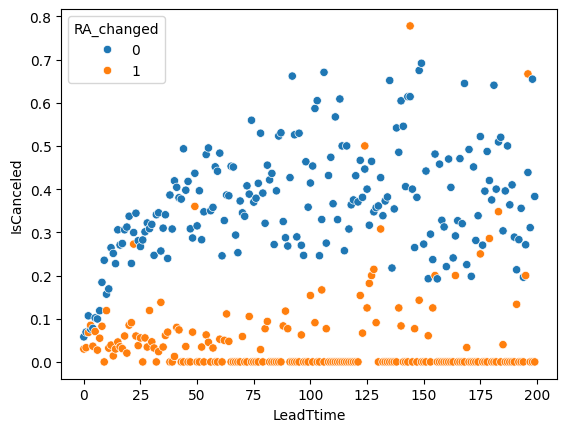

In [29]:
tgt2 = tgt.loc[tgt['LeadTtime'] < 200]
sns.scatterplot(data=tgt2, x='LeadTtime', y='IsCanceled', hue='RA_changed')

# 전반적으로 외국인은 변동이 적고
# 내국인은 예약 객실과 배정 받은 객실이 많이 다름(예약 취소를 줄이려고 다른 객실로 변경하는 경우가 많음
# 2, 3 class -> 2, 1 class 변겨 사례가 많음

In [30]:
# 고객이 차를 가져오는 경우와 안가져오는 경우가 어떻게 다르나 ?
tgt = df.groupby(['LeadTtime', 'car_yes']).agg({label : 'mean'}).reset_index()
tgt

,LeadTtime,car_yes,IsCanceled
0,0,0,0.061784
1,0,1,0.000000
2,1,0,0.074848
3,1,1,0.000000
4,2,0,0.120000
...,...,...,...
721,471,0,1.000000
722,532,0,0.000000
723,542,0,0.000000
724,709,0,0.000000


<Axes: xlabel='LeadTtime', ylabel='IsCanceled'>

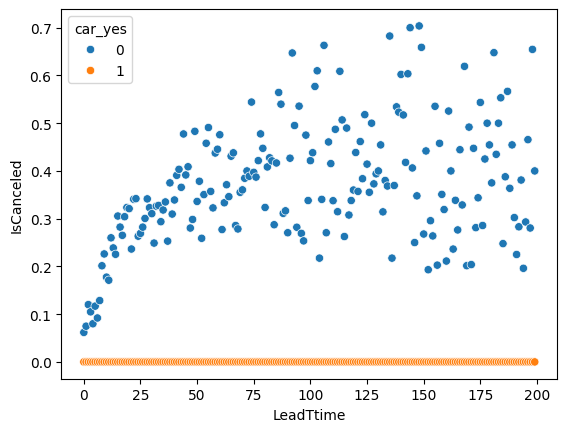

In [31]:
tgt2 = tgt.loc[tgt['LeadTtime'] < 200]
sns.scatterplot(data=tgt2, x='LeadTtime', y='IsCanceled', hue='car_yes')

# 차량이 있는 경우 ㅌ예약 취소는 현저히 줄어듬(거의 안한다)

In [32]:
# 어떤 경로 예약 했는지에 대한 Column(MarketSegment)을 기반으로 의미 있는 문장을 도출
set(df['MarketSegment'])

{'Complementary',
 'Corporate',
 'Direct',
 'Groups',
 'Offline TA/TO',
 'Online TA'}

In [33]:
df['MarketSegment'].value_counts()

MarketSegment
Online TA        17655
Offline TA/TO     7427
Direct            6357
Groups            5832
Corporate         2126
Complementary      199
Name: count, dtype: int64

### Data Preparation
- train, test Split(5:5)

In [34]:
train, test = df[0::2], df[1::2]
train, test  = train.reset_index(), test.reset_index()

In [35]:
train

,index,IsCanceled,LeadTtime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,...,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,day_meal,foreigner,Country_ratio,country_simple,car_yes,RA,RA_changed
0,0,0,342,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,1,0,0.445247,PRT,0,CC,0
1,2,0,7,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,1,1,0.172088,GBR,0,AC,1
2,4,0,14,2015,July,27,1,0,2,2,...,1,Check-Out,2015-07-03,1,1,0.172088,GBR,0,AA,0
3,6,0,0,2015,July,27,1,0,2,2,...,0,Check-Out,2015-07-03,1,0,0.445247,PRT,0,CC,0
4,8,1,85,2015,July,27,1,0,3,2,...,1,Canceled,2015-05-06,1,0,0.445247,PRT,0,AA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19793,39586,0,173,2017,August,35,27,4,9,2,...,1,Check-Out,2017-09-09,3,0,0.445247,PRT,0,DD,0
19794,39588,0,207,2017,August,34,26,4,10,2,...,2,Check-Out,2017-09-09,3,1,0.172088,GBR,0,EE,0
19795,39590,0,169,2017,August,35,30,2,9,2,...,1,Check-Out,2017-09-10,1,1,0.054702,IRL,0,EE,0
19796,39592,0,169,2017,August,35,30,2,9,2,...,1,Check-Out,2017-09-10,1,1,0.054702,IRL,0,EE,0


In [36]:
test

,index,IsCanceled,LeadTtime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,...,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,day_meal,foreigner,Country_ratio,country_simple,car_yes,RA,RA_changed
0,1,0,737,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,1,0,0.445247,PRT,0,CC,0
1,3,0,13,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,1,1,0.172088,GBR,0,AA,0
2,5,0,14,2015,July,27,1,0,2,2,...,1,Check-Out,2015-07-03,1,1,0.172088,GBR,0,AA,0
3,7,0,9,2015,July,27,1,0,2,2,...,1,Check-Out,2015-07-03,2,0,0.445247,PRT,0,CC,0
4,9,1,75,2015,July,27,1,0,3,2,...,0,Canceled,2015-04-22,3,0,0.445247,PRT,0,DD,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19793,39587,0,264,2017,August,34,26,4,10,2,...,0,Check-Out,2017-09-09,1,1,0.012981,other,0,DD,0
19794,39589,0,269,2017,August,34,24,4,13,2,...,2,Check-Out,2017-09-10,1,1,0.172088,GBR,0,DD,0
19795,39591,0,212,2017,August,35,31,2,8,2,...,0,Check-Out,2017-09-10,1,1,0.172088,GBR,0,AA,0
19796,39593,0,204,2017,August,35,29,4,10,2,...,3,Check-Out,2017-09-12,1,1,0.054702,IRL,0,EE,0


In [37]:
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

### Modeling

In [38]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

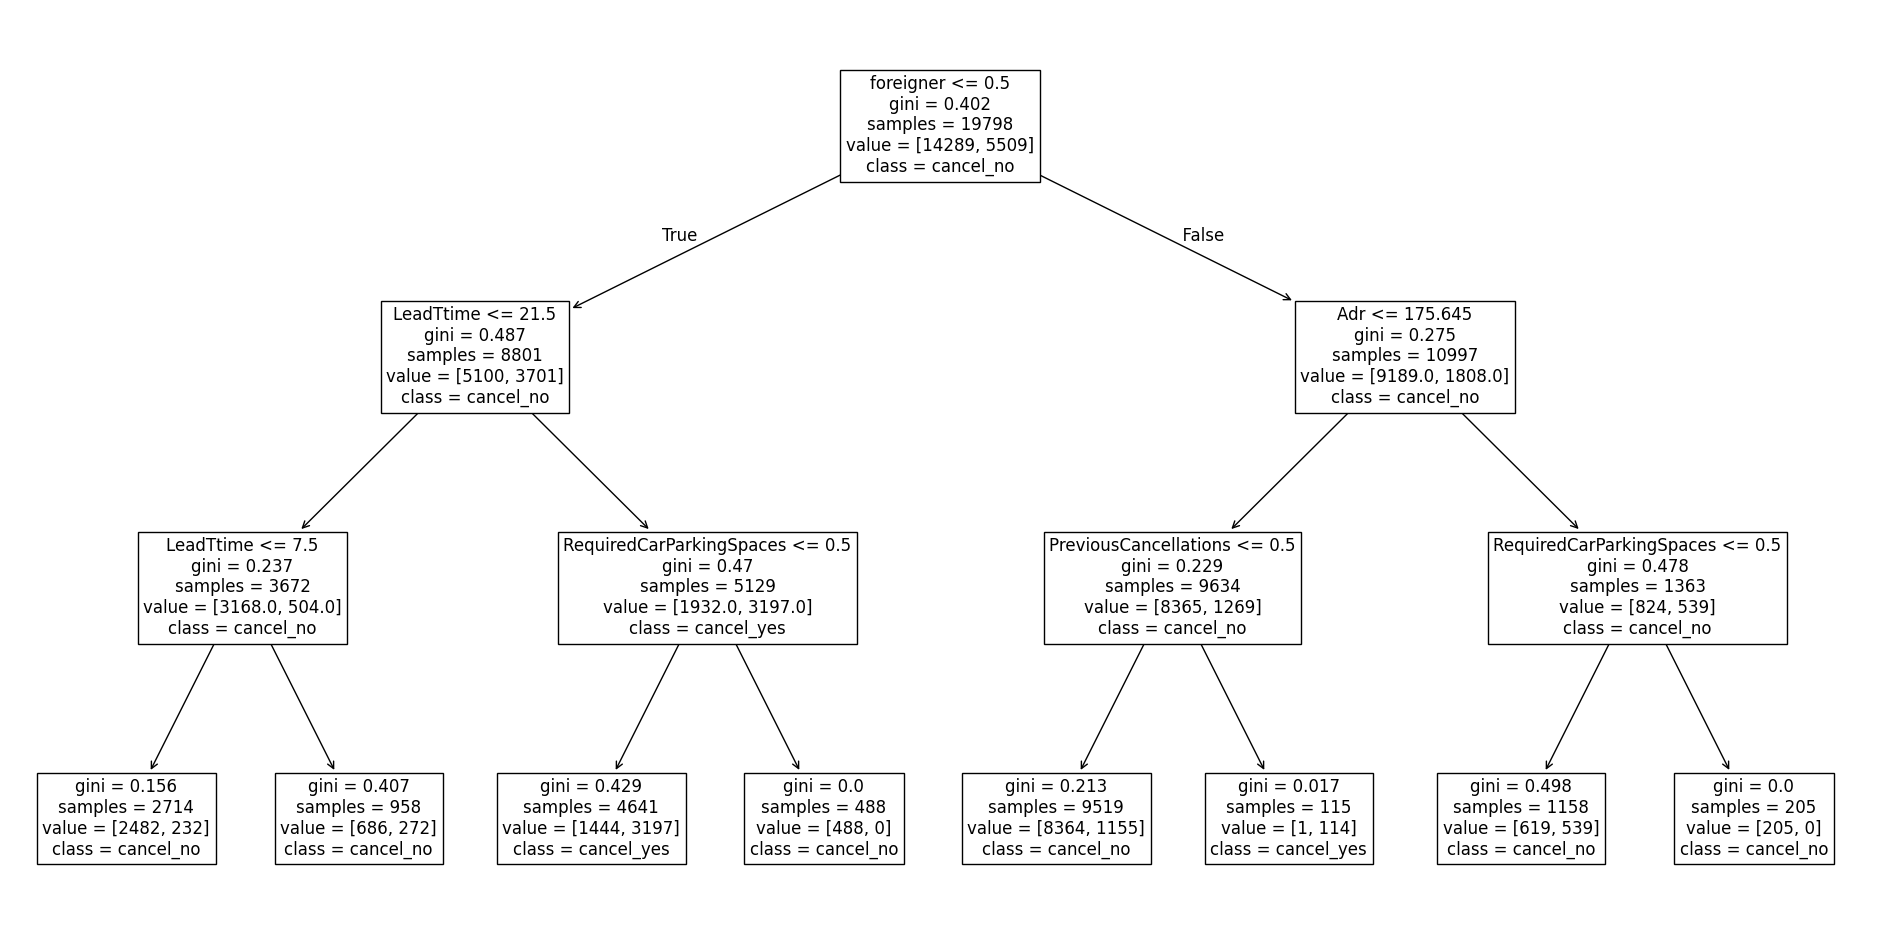

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))
plot_tree(model, max_depth=3, fontsize=12,
          feature_names=X_train.columns,
          class_names=['cancel_no', 'cancel_yes'])

plt.show()

1. 트리 구조 해석

- 분류 기준: Gini 불순도(Gini impurity)
- 분류 목표: cancel_no (취소 아님), cancel_yes (취소)
- 컬럼 예시:
    - foreigner: 외국인 여부
    - LeadTime: 예약과 실제 숙박 사이의 기간
    - Adr: 평균 일일 요금
    - RequiredCarParkingSpaces: 필요한 주차 공간 수
    - PreviousCancellations: 이전 예약 취소 횟수 등

2. 루트 노드 (맨 위)
- 외국인이 아닌 경우(True) 왼쪽 가지
- 외국인인 경우(False) 오른쪽 가지
- 총 19,798개의 데이터 중 14,289건은 cancel_no, 5,509건은 cancel_yes
- 주요 다수 클래스는 cancel_no

3. 왼쪽 가지 (외국인 아님 → True)

3.1 조건: LeadTime <= 21.5
- 예약일과 숙박일 간의 시간이 21.5일 이하인 경우
- 총 샘플 8,801건 중 cancel_no가 5,100, cancel_yes가 3,701

3.1.1 다음 조건 : RequiredCarParkingSpaces <= 0.5
- 필요 주차 공간이 없는 경우
    - 샘플: 5,129
    - cancel_yes가 많음 → 분류값: cancel_yes
    - 이 노드 밑으로도 분기
        - gini = 0.429, 혼합도 꽤 있음
    - 왼쪽: gini = 0.429,
        - cancel_yes가 다수 (샘플 4,641 중 3,197)
    - 오른쪽: gini = 0.0, cancel_no만 존재 → 488건 전부 cancel_no

- 필요 주차 공간이 있는 경우
    - 샘플: 115
    - 거의 대부분 cancel_yes → 114건
    - gini = 0.017 → 거의 순수한 노드

3.2 조건: LeadTime > 21.5
- 다시 나뉨: LeadTime <= 7.5
- 샘플: 3,672건
    - 왼쪽: cancel_no 다수 → 2,714건
    - 오른쪽: cancel_yes 증가 → 958건 중 272건이 cancel_yes (gini = 0.407)

4. 오른쪽 가지 (외국인임 → False)
4.1 조건: Adr <= 175.645
    - 평균 요금이 낮은 경우 (10,997건)
        - cancel_no가 대부분 → 9,189건
4.1.1 PreviousCancellations <= 0.5
- 이전 취소가 없다면 cancel_no가 대부분
    - 샘플 9,634건 중 8,365건 cancel_no
    - 샘플 9,634건 중 1,269건 cancel_yes
- 이전 취소가 있다면 cancel_yes가 많아짐
    - 샘플: 1,363
    - 아래로 또 분기:
        - 주차 공간 없음(왼쪽): 1,158 cancel_no가 더 많음
        - 주차 공간 있음(오른쪽): 205 전부 cancel_no

### 지니계수 계산 방식 
- 경제적 불평등의 정도를 계획화한 것
- 불순도 확인( 불순도 정도 )
- 특정 사건 일어날 확률 -> yes_prob
- 특정 사건 일어나지 않을 확율 -> no_prob
- A = yes_prob * ( 1 - yes_prob )
- B = no_prob * ( 1 - no_prob )
- A + B = Gini

In [40]:
size = 19798

yes_prob = 5509 / size
no_prob = 14289 / size 

A = yes_prob * ( 1 - yes_prob )
B = no_prob * ( 1 - no_prob )
print(A + B) 

0.4016631264997609


In [41]:
yes_prob = 0
no_prob = 0

A = yes_prob * ( 1 - yes_prob )
B = no_prob * ( 1 - no_prob )
print(A + B) 

0


In [42]:
# pip install  graphviz

In [43]:
from sklearn.tree import export_graphviz

In [44]:
export_graphviz(model,
               out_file='./tree.dot',
               feature_names=features,
               class_names=['cancel_no', 'cancel_yes'],
               rounded=True,   # 사각형  끝을 둥글게
               filled=True )   # 사각형 안을 색깔 채우기

In [45]:
# 에측한 모형을 png로 바꿔서, 시각화 하기
from subprocess import check_call

In [46]:
check_call(['dot', '-Tpng', './tree.dot', '-o', './OutputFile.png'])

0

In [47]:
df.columns

Index(['IsCanceled', 'LeadTtime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'Adr', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'day_meal', 'foreigner', 'Country_ratio', 'country_simple', 'car_yes',
       'RA', 'RA_changed'],
      dtype='object')

In [48]:
set(df['PreviousCancellations'])   # 최대 예약 취소를 26번까지 취소 했음

{0, 1, 2, 3, 4, 5, 14, 19, 24, 25, 26}

# 알고리즘 구분 용어 (대부분이  emsemble, baggingm boosting 임)
- ensemble : 음악에서 연주할 때 합창, 협주 -> 1인 x, 여럿이 같이 결과를 도출하는것
  (RandomForest - 여러개의 tree 연산 결과를 합 한것 )
- 회귀문제 : n개의 알고리즘 결과값(숫자)들의 평균
- 분류문제 : n개의 알고지즘 결과값(경우의 수)들의 투표
- 대표적인 알고리즘 : RandomGorest, Extra Tres, Gradient Boosting)
- bagging
- boosting

### bagging
- boostrap + aggregation + ing : b + agg + ing
- boostrap : 데이셋의 row를 무작위로 복원 추출 -> 새로운 데이터셋 생성(중복된 row가 있을 수 있음) -> 여러개(100)
- train:test > train 데이터 중에서 복원 추출 > 분류: 투표, 회귀 : 평균
- 동일한 데이터와 알고리즘으로 학습함으로 항상 같은(비숫한) 결과가 나옴-> bootstrap을 이용하면
  새로운 데이터 셋을 만들때마다 row의 구성이 조그씩 다르게 구성됨
- bootstrap으로 서로 조그씩 다른 데이터 셋을 n개 만들고, n개의 데이터 셋에 대해 학습을 진행
  (학습 결과는 조금 다르게됨) -> n개의 학습 결과를 합산

## Boosting : tuning을 병행야함-> 충분한 시간을 가지고 해야함
   시간이 부족 : RandomForest 추진
- 이전 모델의 오차를 보완하는 방향으로 만들어짐
- 오답을 이용해 점수 상을 도모, 오답을 새로운 정보러 이용한 접근법을 통칭
- 첫번째 알고리즘으로 학습하고 예측하여 오답정보를 만듬 -> 오답 정보의 문제를 학습 대상 데이터세에 추가해서 새로운 데이터 섹을 생성
- 두번째 알고리즘으로 새로운 데이터 셋에 대하여 학습하고 예특 오답 정보를 만듬 -> n번 반복
- 1 번 문제를 풀고 > 틀린 문제 > 2번 타자에서 1번의 틀린 문제를 풀고 -> 3번 타자에게 2번 타자가 틀린 문제를 풀고: 정답을 극대화하는 알고리즘

- actual : 10, predict : 7, error: 3
- actual : 3, predict : 2 , error : 1
- actial : 1, predict : 0.5, error : 0.5

- result : 7 + 2 + 0.5 / 10 = 0.95

- 고질적인 문제 : 속도가 늦음, 이전 학습이 끝나야 다음 학습을 진행 할 수 있음(순차적인 학습)

## GBDT( Gradient Boosted Decision Tree )
- Decision Tree를 사용해 이전 Tree의 오차를 보완하는 방식으로 경사 하강법을 사용해서 ensemble 하는 하는 방법
- XGBoost, CatBooat(러시아), LightGBM(마이크 소프트): 머신러닝에서 사용
- bagging을 병열 처리가 가능하지만, boosting을 병렬처리가 안됨(시간 오래 소요)
- XGBoost는 기존 Bossting 문제점 보완해서 병령 처리가 어느 정도 가능하도록 수정
  (사기업에서 민든것이 아니라 커뮤니티에서 만듬)

In [ ]:
문류 문제의 평가 지표